In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.15.0


In [3]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                

In [4]:
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         horizontal_flip = True,
                                         zoom_range = 0.2)

val_datagen = image.ImageDataGenerator(rescale=1./255)

In [7]:
training_data = train_datagen.flow_from_directory(r'CovidDataset\Data\train',
                                                  target_size=(224,224),
                                                  class_mode='binary',
                                                  batch_size=32)

val_data = val_datagen.flow_from_directory(r'CovidDataset\Data\test',
                                           target_size=(224,224),
                                           class_mode='binary',
                                           batch_size=32)

Found 1726 images belonging to 2 classes.
Found 433 images belonging to 2 classes.


In [8]:
training_data.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [9]:
val_data.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [10]:
e = 20
hist = model.fit(training_data,
                    steps_per_epoch=8,
                    epochs = e,
                    validation_data = val_data,
                    validation_steps = 2)

Epoch 1/20


8/8 [==============================] - 56s 7s/step - loss: 1.0383 - accuracy: 0.5273 - val_loss: 0.6222 - val_accuracy: 0.6875
Epoch 2/20
8/8 [==============================] - 54s 7s/step - loss: 0.5663 - accuracy: 0.7695 - val_loss: 0.6420 - val_accuracy: 0.6719
Epoch 3/20
8/8 [==============================] - 53s 6s/step - loss: 0.5484 - accuracy: 0.7695 - val_loss: 0.5924 - val_accuracy: 0.7656
Epoch 4/20
8/8 [==============================] - 55s 7s/step - loss: 0.4791 - accuracy: 0.7891 - val_loss: 0.5875 - val_accuracy: 0.6250
Epoch 5/20
8/8 [==============================] - 52s 6s/step - loss: 0.4750 - accuracy: 0.7227 - val_loss: 0.4181 - val_accuracy: 0.7500
Epoch 6/20
8/8 [==============================] - 45s 5s/step - loss: 0.3436 - accuracy: 0.8086 - val_loss: 0.1655 - val_accuracy: 0.9531
Epoch 7/20
8/8 [==============================] - 43s 5s/step - loss: 0.2877 - accuracy: 0.8268 - val_loss: 0.2355 - val_accuracy: 0.9531
Epoch 8/20
8/8 [================

In [11]:
model.save('covid.h5')

c:\Users\Anuj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


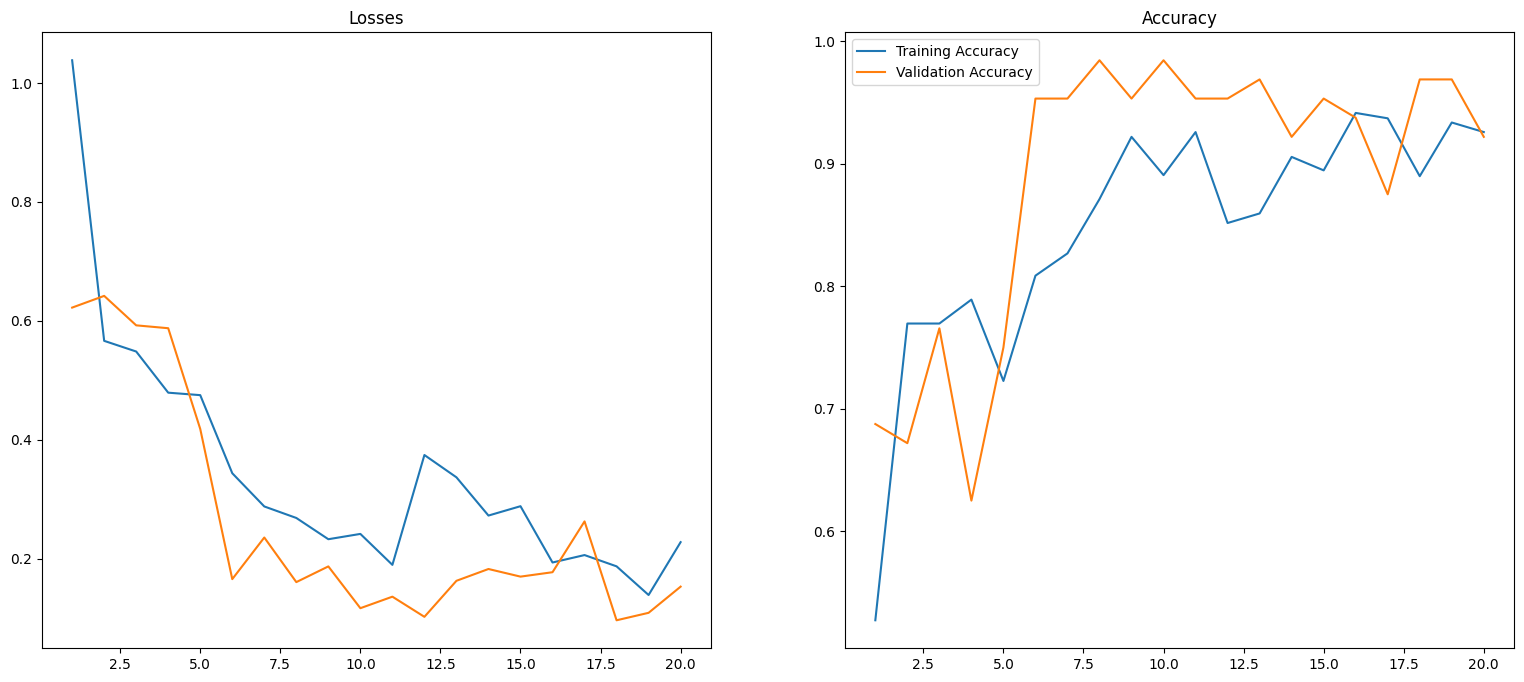

In [12]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epochs = range(1,e+1)

plt.figure(figsize=(19,8))
plt.subplot(121)
plt.plot(epochs,train_loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.title('Losses')

plt.subplot(122)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.title('Accuracy')

plt.legend()

In [1]:
from tensorflow.keras.models import load_model
covid_model = load_model('covid.h5')

In [6]:
from PIL import Image
import numpy as np

# Load the image
image_path = r"D:\IT\Final year Project\CovidDataset\Data\test\COVID19\COVID19(547).jpg" # Replace 'path_to_your_image.jpg' with the actual path to your image
image = Image.open(image_path)

# Preprocess the image
image = image.resize((224, 224))  # Resize the image to match the input size of your model
image_array = np.array(image)  # Convert the image to a numpy array
image_array = image_array / 255.0  # Normalize pixel values to be between 0 and 1 (assuming your model expects inputs in this range)
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

# Predict using the model
prediction = covid_model.predict(image_array)
if prediction<0.5:
    print("Covid positive")
else:
    print("Covid negative")


1/1 [==============================] - 0s 110ms/step
Covid positive
